In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Get the data
attributes = ['age','workclass', 'fnlwgt','education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'country','salary']
train_set = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data",1,",",names=attributes)

df_train_set = pd.DataFrame(train_set)
train_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(train_set.shape)
train_set.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# dropping the columns capital-gain and capital-loss as 75% of the values of them are 0s
train_set.drop(['capital-gain','capital-loss'],axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [5]:
# remove white spaces from the dataframe
for col in train_set.columns:
    if type(train_set[col][0]) == str:
        print("Working on " + col)
        train_set[col] = train_set[col].apply(lambda val: val.replace(" ",""))

Working on workclass
Working on education
Working on marital-status
Working on occupation
Working on relationship
Working on race
Working on sex
Working on country
Working on salary


In [6]:
# find missing values in the dataframe
col_names = train_set.columns
num_data = train_set.shape[0]
for c in col_names:
    num_non = train_set[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


country
583
1.79%




In [7]:
# remove those missing values from the dataframe
train_set = train_set[train_set["workclass"] != "?"]
train_set = train_set[train_set["occupation"] != "?"]
train_set = train_set[train_set["country"] != "?"]

train_set.shape

(30162, 15)

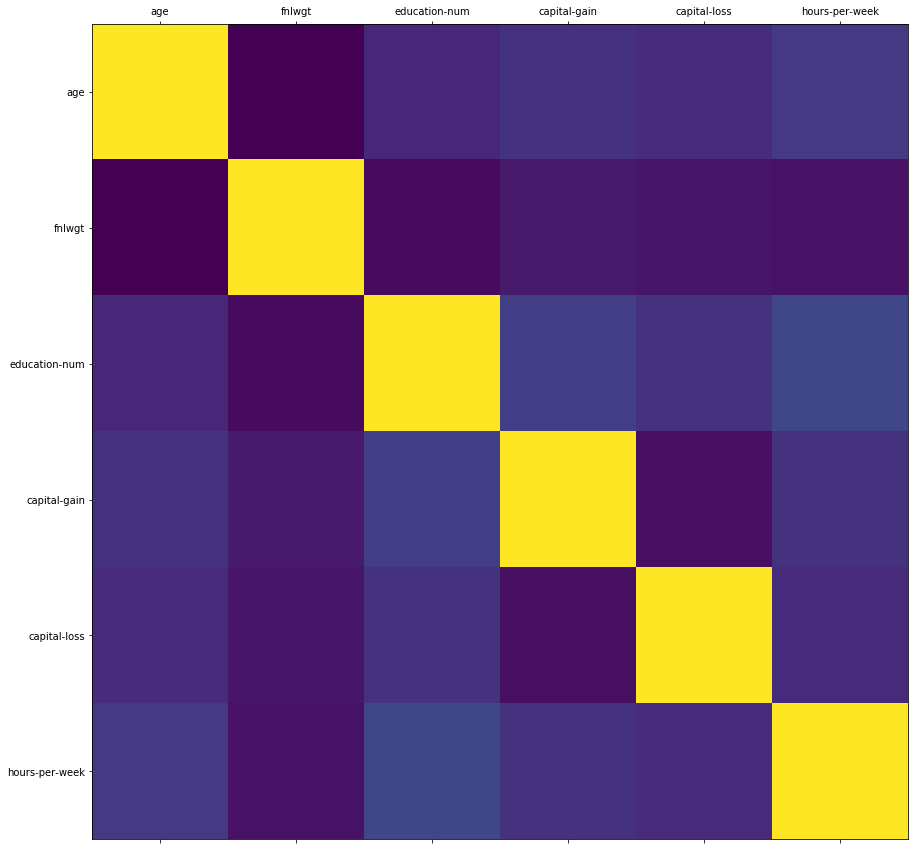

In [8]:
# find correlations between columns
corr= train_set.corr()
fig, ax =plt.subplots(figsize=(15,15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [9]:
# create additional features(attributes)
train_set = pd.concat([train_set, pd.get_dummies(train_set['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
train_set.drop('workclass',axis=1,inplace=True)

train_set = pd.concat([train_set, pd.get_dummies(train_set['marital-status'],prefix='marital-status',prefix_sep=':')], axis=1)
train_set.drop('marital-status',axis=1,inplace=True)

train_set = pd.concat([train_set, pd.get_dummies(train_set['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
train_set.drop('occupation',axis=1,inplace=True)

train_set = pd.concat([train_set, pd.get_dummies(train_set['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
train_set.drop('relationship',axis=1,inplace=True)

train_set = pd.concat([train_set, pd.get_dummies(train_set['race'],prefix='race',prefix_sep=':')], axis=1)
train_set.drop('race',axis=1,inplace=True)

train_set = pd.concat([train_set, pd.get_dummies(train_set['sex'],prefix='sex',prefix_sep=':')], axis=1)
train_set.drop('sex',axis=1,inplace=True)

# Do this one last so it's at the far right of the DataFrame
train_set = pd.concat([train_set, pd.get_dummies(train_set['salary'],drop_first=True)], axis=1)
train_set.drop('salary', axis=1,inplace=True)

train_set.drop('country',axis=1,inplace=True)
train_set.drop('education', axis=1,inplace=True)

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 48 columns):
age                                     30162 non-null int64
fnlwgt                                  30162 non-null int64
education-num                           30162 non-null int64
capital-gain                            30162 non-null int64
capital-loss                            30162 non-null int64
hours-per-week                          30162 non-null int64
workclass:Federal-gov                   30162 non-null uint8
workclass:Local-gov                     30162 non-null uint8
workclass:Private                       30162 non-null uint8
workclass:Self-emp-inc                  30162 non-null uint8
workclass:Self-emp-not-inc              30162 non-null uint8
workclass:State-gov                     30162 non-null uint8
workclass:Without-pay                   30162 non-null uint8
marital-status:Divorced                 30162 non-null uint8
marital-status:Married-AF-spouse     

In [11]:
train_set.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass:Federal-gov,workclass:Local-gov,workclass:Private,workclass:Self-emp-inc,...,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male,>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [12]:
# Cleaning test data set
test_set = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.test',1,",",skiprows=1,names=attributes)
df_test_set = pd.DataFrame(test_set)

In [13]:
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [14]:
print(test_set.shape)
test_set.describe()

(16281, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [15]:
# dropping capital-gain and capital-loss
test_set.drop(['capital-gain','capital-loss'],axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


In [16]:
# remove whitespaces
for col in test_set.columns:
    if type(test_set[col][0]) == str:
        print("Working on " + col)
        test_set[col] = test_set[col].apply(lambda val: val.replace(" ",""))

Working on workclass
Working on education
Working on marital-status
Working on occupation
Working on relationship
Working on race
Working on sex
Working on country
Working on salary


In [17]:
# find missing values
col_names = test_set.columns
num_data = test_set.shape[0]
for c in col_names:
    num_non = test_set[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
963
5.91%


occupation
966
5.93%


country
274
1.68%




In [18]:
# remove missing values
test_set = test_set[test_set["workclass"] != "?"]
test_set = test_set[test_set["occupation"] != "?"]
test_set = test_set[test_set["country"] != "?"]

In [19]:
test_set.shape

(15060, 15)

In [20]:
# create additional features(attributes)
test_set = pd.concat([test_set, pd.get_dummies(test_set['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
test_set.drop('workclass',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['marital-status'],prefix='marital-status',prefix_sep=':')], axis=1)
test_set.drop('marital-status',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
test_set.drop('occupation',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
test_set.drop('relationship',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['race'],prefix='race',prefix_sep=':')], axis=1)
test_set.drop('race',axis=1,inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['sex'],prefix='sex',prefix_sep=':')], axis=1)
test_set.drop('sex',axis=1,inplace=True)

test_set.drop('salary', axis=1,inplace=True)
test_set.drop('country',axis=1,inplace=True)
test_set.drop('education', axis=1,inplace=True)

test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 47 columns):
age                                     15060 non-null int64
fnlwgt                                  15060 non-null int64
education-num                           15060 non-null int64
capital-gain                            15060 non-null int64
capital-loss                            15060 non-null int64
hours-per-week                          15060 non-null int64
workclass:Federal-gov                   15060 non-null uint8
workclass:Local-gov                     15060 non-null uint8
workclass:Private                       15060 non-null uint8
workclass:Self-emp-inc                  15060 non-null uint8
workclass:Self-emp-not-inc              15060 non-null uint8
workclass:State-gov                     15060 non-null uint8
workclass:Without-pay                   15060 non-null uint8
marital-status:Divorced                 15060 non-null uint8
marital-status:Married-AF-spouse     

In [21]:
test_set.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass:Federal-gov,workclass:Local-gov,workclass:Private,workclass:Self-emp-inc,...,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,sex:Female,sex:Male
0,25,226802,7,0,0,40,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
# Replace the salary column with a single binary representation
# This will be used for Y test
df_test_set = pd.concat([df_test_set, pd.get_dummies(df_test_set['salary'],drop_first=True)], axis=1)
df_test_set.drop('salary',axis=1,inplace=True)
df_test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,>50K.
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [23]:
df_test_set.rename(columns = {'>50K.':'>50K'},inplace=True)

In [24]:
# remove the missing values from df_test_set to avoid inconsistencies
df_test_set = df_test_set[df_test_set["workclass"] != "?"]
df_test_set = df_test_set[df_test_set["occupation"] != "?"]
df_test_set = df_test_set[df_test_set["country"] != "?"]
df_test_set.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,>50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [25]:
df_test_set.shape

(15060, 15)

In [26]:
# building the model, using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X_train = train_set.drop('>50K',axis=1)
y_train = train_set['>50K']
X_test = pd.DataFrame(test_set)
y_test = df_test_set['>50K']

In [27]:
# without scaling

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predictions = model.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))

[[10954   406]
 [ 2721   979]]


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88     11360
           1       0.71      0.26      0.39      3700

   micro avg       0.79      0.79      0.79     15060
   macro avg       0.75      0.61      0.63     15060
weighted avg       0.78      0.79      0.75     15060



In [33]:
# with scaling

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [35]:
scaled_model = LogisticRegression()

In [36]:
scaled_model.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
scaled_predictions = scaled_model.predict(X_test)

In [38]:
# With Scaling X_train and X_test
print(confusion_matrix(y_test,scaled_predictions))

[[10525   835]
 [ 1460  2240]]


In [40]:
# With Scaling X_train and X_test
print('Accuracy')
print(accuracy_score(y_test,scaled_predictions))
print(classification_report(y_test,scaled_predictions))

Accuracy
0.8476095617529881
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.61      0.66      3700

   micro avg       0.85      0.85      0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

X_train = train_set.drop('>50K',axis=1)
y_train = train_set['>50K']
X_test = pd.DataFrame(test_set)
y_test = df_test_set['>50K']
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [42]:
print('Accuracy')
print(accuracy_score(y_test,prediction))
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

Accuracy
0.848605577689243
Confusion Matrix:
[[10481   879]
 [ 1401  2299]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.67      3700

   micro avg       0.85      0.85      0.85     15060
   macro avg       0.80      0.77      0.79     15060
weighted avg       0.84      0.85      0.84     15060



In [43]:
prediction.shape

(15060,)

In [44]:
n = prediction.shape[0]
print(n)

15060


In [45]:
new_df =  pd.DataFrame()

In [46]:
for i in range(n):
    if prediction[i] == 1:
        new_df = new_df.append(X_test.iloc[i, :])

In [47]:
new_df.shape

(3178, 47)

In [48]:
# selecting 90%
temp = new_df.shape[0]
print(temp)
ninety_percent = 0.9 * temp
print(ninety_percent)

3178
2860.2000000000003


In [50]:
df = new_df.iloc[0:2860, :]

In [51]:
df.shape

(2860, 47)

In [52]:
# The above DataFrame represents the number of Guests to be invited in the wedding.

In [53]:
df

,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week,marital-status:Divorced,marital-status:Married-AF-spouse,marital-status:Married-civ-spouse,marital-status:Married-spouse-absent,...,relationship:Wife,sex:Female,sex:Male,workclass:Federal-gov,workclass:Local-gov,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay
3,44.0,7688.0,0.0,10.0,160323.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,63.0,3103.0,0.0,15.0,104626.0,32.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,65.0,6418.0,0.0,9.0,184454.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15,43.0,0.0,0.0,14.0,346189.0,50.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17,43.0,0.0,0.0,9.0,128354.0,30.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,34.0,0.0,0.0,13.0,107914.0,47.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25,45.0,7298.0,0.0,9.0,432824.0,90.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,46.0,7688.0,0.0,10.0,106444.0,38.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,36.0,0.0,0.0,13.0,403681.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40,65.0,0.0,0.0,14.0,136384.0,50.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
